In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (6, 4)
%matplotlib inline

In [3]:
df = pd.read_csv("cybersecurity.csv")
df.head()

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB


In [5]:
df.describe()

,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,attack_detected
count,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000
mean,500.430639,4.032086,792.745312,0.331338,1.517773,0.149942,0.447101
std,198.379364,1.963012,786.560144,0.177175,1.033988,0.357034,0.497220
min,64.000000,1.000000,0.500000,0.002497,0.000000,0.000000,0.000000
25%,365.000000,3.000000,231.953006,0.191946,1.000000,0.000000,0.000000
50%,499.000000,4.000000,556.277457,0.314778,1.000000,0.000000,0.000000
75%,635.000000,5.000000,1105.380602,0.453388,2.000000,0.000000,1.000000
max,1285.000000,13.000000,7190.392213,0.924299,5.000000,1.000000,1.000000


In [6]:
print(df.isnull().sum())

session_id                0
network_packet_size       0
protocol_type             0
login_attempts            0
session_duration          0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
browser_type              0
unusual_time_access       0
attack_detected           0
dtype: int64


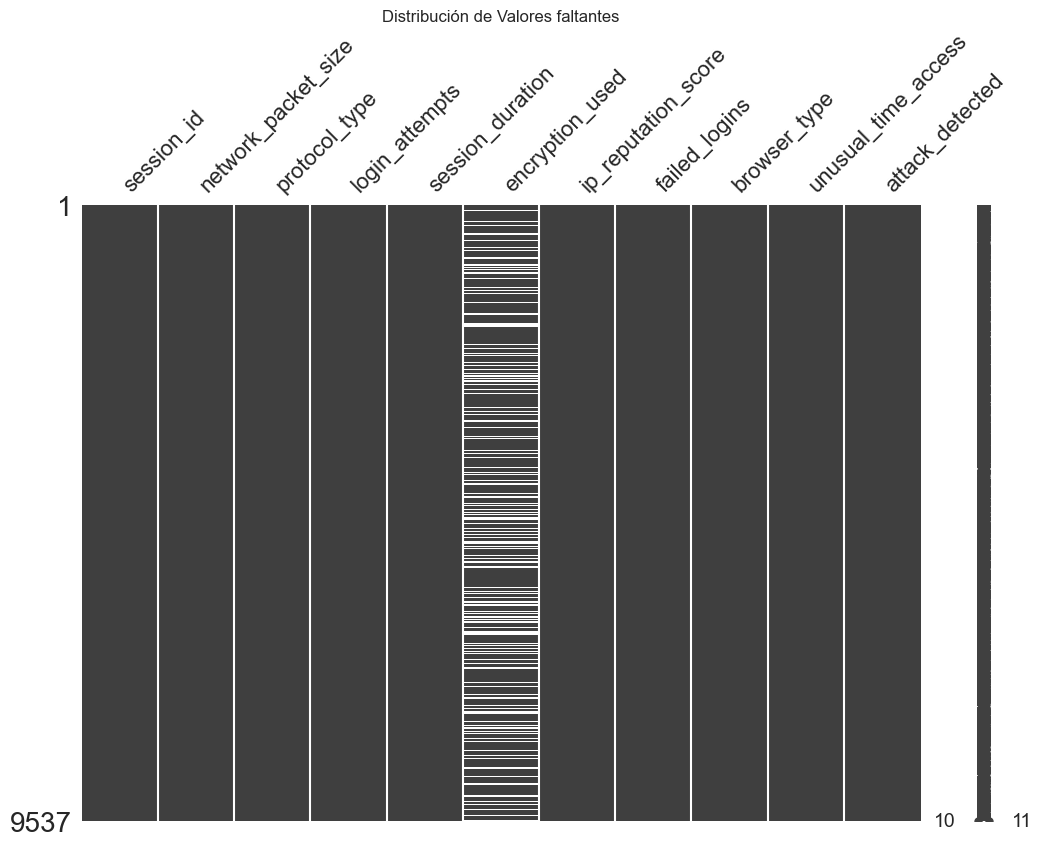

In [7]:
msno.matrix(df, figsize=(12, 8))
plt.title('Distribución de Valores faltantes')
plt.show()

In [8]:
missing_percent = df.isnull().sum() / len(df) * 100
missing_percent

session_id              0.000000
network_packet_size     0.000000
protocol_type           0.000000
login_attempts          0.000000
session_duration        0.000000
encryption_used        20.614449
ip_reputation_score     0.000000
failed_logins           0.000000
browser_type            0.000000
unusual_time_access     0.000000
attack_detected         0.000000
dtype: float64

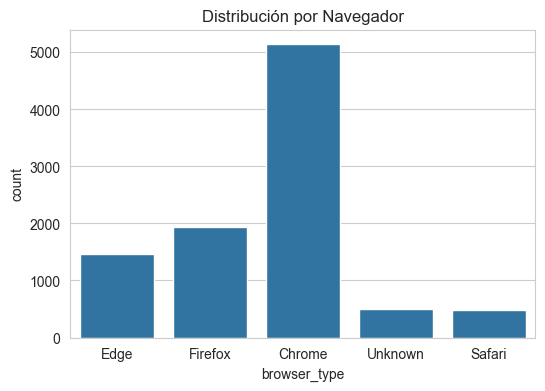

In [9]:
sns.countplot(x="browser_type", data=df)
plt.title("Distribución por Navegador")
plt.show()

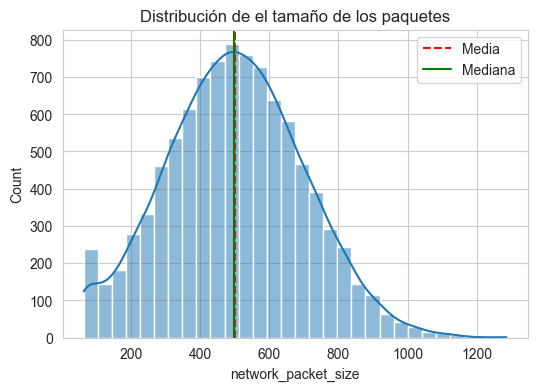

In [10]:
sns.histplot(df["network_packet_size"], kde=True, bins=30)
plt.title("Distribución de el tamaño de los paquetes")
plt.axvline(df["network_packet_size"].mean(), color='r', linestyle='--', label='Media')
plt.axvline(df["network_packet_size"].median(), color='g', linestyle='-', label='Mediana')
plt.legend()
plt.show()

/var/folders/ry/4ct4vn5n42g7p0lbjclcwcth0000gn/T/ipykernel_44622/2022503734.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="attack_detected",data=df,palette="Blues")


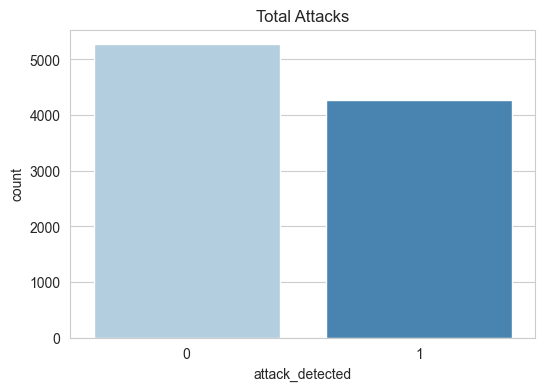

In [11]:
sns.countplot(x="attack_detected",data=df,palette="Blues")
plt.title("Total Attacks")
plt.show()

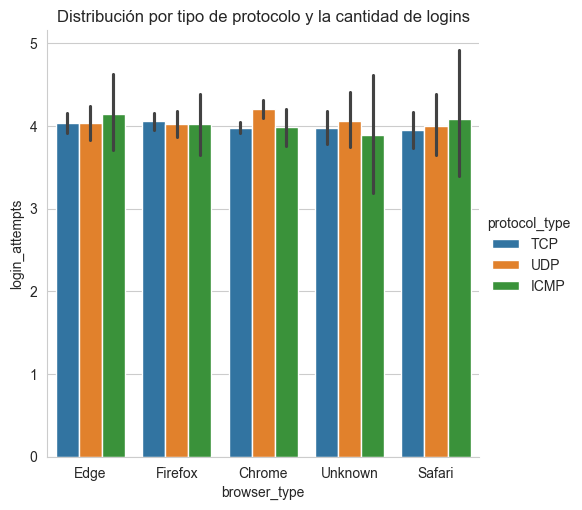

In [12]:
sns.catplot(x="browser_type", y="login_attempts", hue="protocol_type", kind="bar", data=df)
plt.title("Distribución por tipo de protocolo y la cantidad de logins")
plt.show()

## Relación entre los ataques detectados y otras variables específicas

Se propone investigar qué tan predictivas son ciertas variables para los ataques:

### Puntaje de reputación de IP

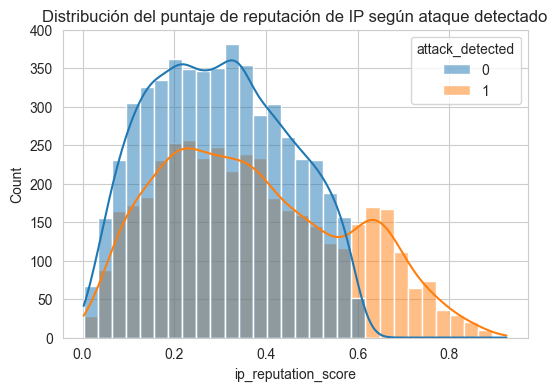

In [13]:
sns.histplot(data=df, x="ip_reputation_score", hue="attack_detected", kde=True, bins=30)
plt.title("Distribución del puntaje de reputación de IP según ataque detectado")
plt.show()

**Cómo interpretar la gráfica:**

- Si los ataques (`attack_detected`=1) se concentran en valores altos de ip_reputation_score (cercanos a 1), significa que las IPs con mala reputación tienen mayor probabilidad de estar involucradas en ataques.

- Si la distribución es más uniforme, la reputación de IP no es un predictor fuerte.

**Posibles hallazgos:**

- Si encontramos que la mayoría de ataques ocurren cuando ip_reputation_score > 0.7, podríamos establecer un umbral para detección temprana.

### Intentos de login y fallos de autenticación

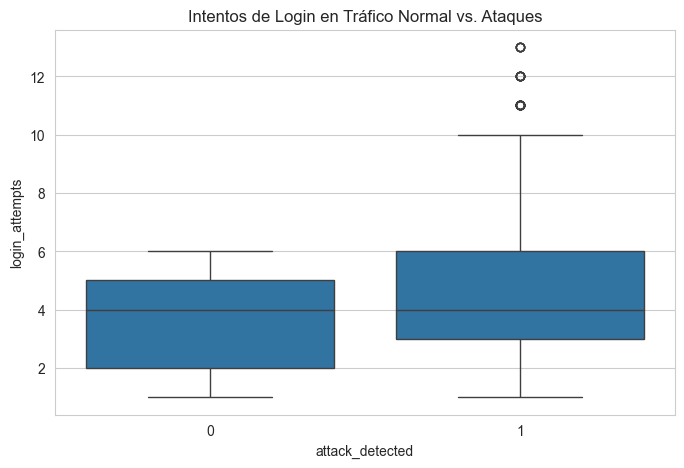

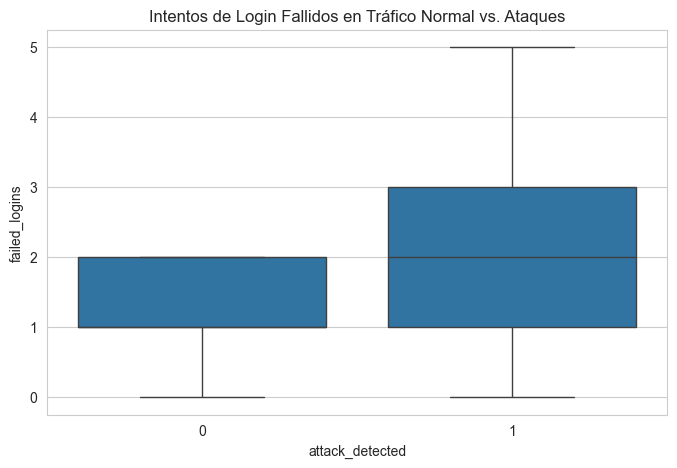

In [16]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="attack_detected", y="login_attempts", data=df)
plt.title("Intentos de Login en Tráfico Normal vs. Ataques")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x="attack_detected", y="failed_logins", data=df)
plt.title("Intentos de Login Fallidos en Tráfico Normal vs. Ataques")
plt.show()

**Cómo interpretar estos boxplots:**

- Si los ataques (attack_detected=1) tienen un número significativamente mayor de intentos de login o fallos de autenticación, podría indicar fuerza bruta o ataques de diccionario.

- Si hay valores atípicos con intentos extremadamente altos, pueden ser ataques intensivos.

**Posibles hallazgos:**

- Un alto número de intentos de login en sesiones marcadas como ataques sugeriría re que podríamos usar este umbral como regla de detección.

### Accesos en horarios inusuales

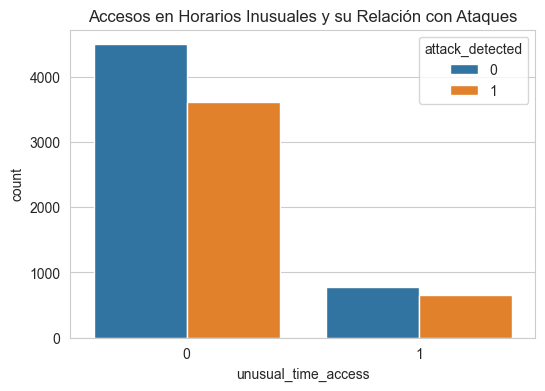

In [19]:
sns.countplot(x="unusual_time_access", hue="attack_detected", data=df)
plt.title("Accesos en Horarios Inusuales y su Relación con Ataques")
plt.show()

**Cómo interpretar la gráfica:**

- Si los ataques (`attack_detected=1`) ocurren mayormente `cuando unusual_time_access=1`, entonces el acceso fuera de horario normal es un buen indicador de actividad maliciosa.

**Posibles hallazgos:**

- Si encontramos que el 80% de los ataques ocurren fuera del horario habitual, podríamos usar esta señal para reforzar alertas.

### Protocolos de red

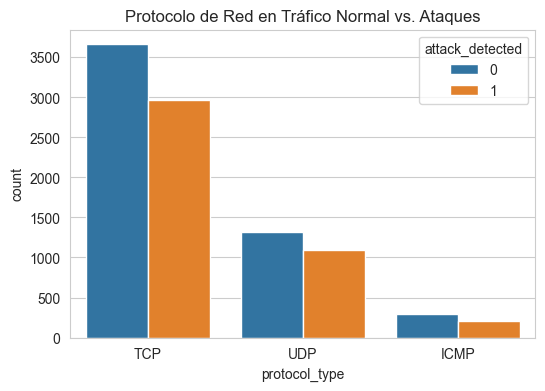

In [26]:
sns.countplot(x="protocol_type", hue="attack_detected", data=df)
plt.title("Protocolo de Red en Tráfico Normal vs. Ataques")
plt.show()

### Tipo de navegador 

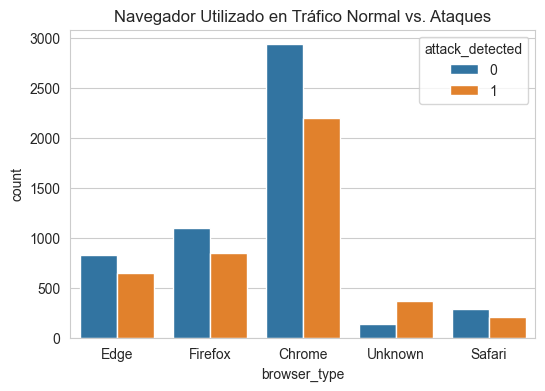

In [28]:
sns.countplot(x="browser_type", hue="attack_detected", data=df)
plt.title("Navegador Utilizado en Tráfico Normal vs. Ataques")
plt.show()

**Cómo interpretar la gráfica:**

- Si los ataques están fuertemente asociados con Unknown, es probable que provengan de bots o scripts automatizados.

**Posibles hallazgos:**

- Ataques con navegadores desconocidos → actividad automatizada.